In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
total_data = pd.read_csv('mainMar.csv', encoding='cp949')

In [ ]:
total_data = total_data.drop(columns=['구', '연령대_가중치지수','연령대_가중치정규화'])

In [ ]:
total_data = total_data.dropna(subset=['총_사용인원'])

In [13]:
X = total_data[['500m내_대여소가중치','500m내_버스정류소가중치','500m내_지하철역가중치','500m내_교차로가중치','500m내_자전거보관소가중치','500m내_자전거도로가중치','500m내_고등학교가중치','500m내_대학교가중치','500m내_사고건수_가중치']]
Y = total_data['평균_사용인원'] 

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

선형 회귀 분석

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [31]:
linear_pred = linear_model.predict(X_test)

In [32]:
linear_spuared = mean_squared_error(Y_test, linear_pred)
linear_absolute = mean_absolute_error(Y_test, linear_pred)
linear_r2_score = r2_score(Y_test, linear_pred)

랜덤 포레스트

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
randomf_model = RandomForestRegressor(n_estimators=100)
randomf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [34]:
randomf_pred = randomf_model.predict(X_test)

In [35]:
randomf_spuared = mean_squared_error(Y_test, randomf_pred)
randomf_absolute = mean_absolute_error(Y_test, randomf_pred)
randomf_r2_score = r2_score(Y_test, randomf_pred)

XGBoost Regressor

In [36]:
!pip install xgboost
from xgboost import XGBRegressor

In [37]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
xgb_pred = xgb_model.predict(X_test)

In [39]:
xgb_spuared = mean_squared_error(Y_test, xgb_pred)
xgb_absolute = mean_absolute_error(Y_test, xgb_pred)
xgb_r2_score = r2_score(Y_test, xgb_pred)

Lasso 기반 특성 선택

In [42]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, Y_train)

LassoCV(cv=5)

In [ ]:
lasso_pred = lasso_model.predict(X_test)

In [50]:
lasso_spuared = mean_squared_error(Y_test, lasso_pred)
lasso_absolute = mean_absolute_error(Y_test, lasso_pred)
lasso_r2_score = r2_score(Y_test, lasso_pred)

SFS 순차적 특성 
SFS는 단독 불가, 항상 모델과 함께 사용해야 함.
가장 좋은 조합 선택 하는것

Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)

Ridge()

In [51]:
ridge_pred = ridge_model.predict(X_test)

In [52]:
ridge_spuared = mean_squared_error(Y_test, ridge_pred)
ridge_absolute = mean_absolute_error(Y_test, ridge_pred)
ridge_r2_score = r2_score(Y_test, ridge_pred)

ElasticNet

In [55]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [59]:
elan_model = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5))
elan_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet())])

In [60]:
elan_pred = elan_model.predict(X_test)

In [61]:
elan_spuared = mean_squared_error(Y_test, elan_pred)
elan_absolute = mean_absolute_error(Y_test, elan_pred)
elan_r2_score = r2_score(Y_test, elan_pred)

KNN Regressor

In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
KNN_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
KNN_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [64]:
KNN_pred = KNN_model.predict(X_test)

In [65]:
KNN_spuared = mean_squared_error(Y_test, KNN_pred)
KNN_absolute = mean_absolute_error(Y_test, KNN_pred)
KNN_r2_score = r2_score(Y_test, KNN_pred)

In [66]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mean Squared Error of Various Regression Models')

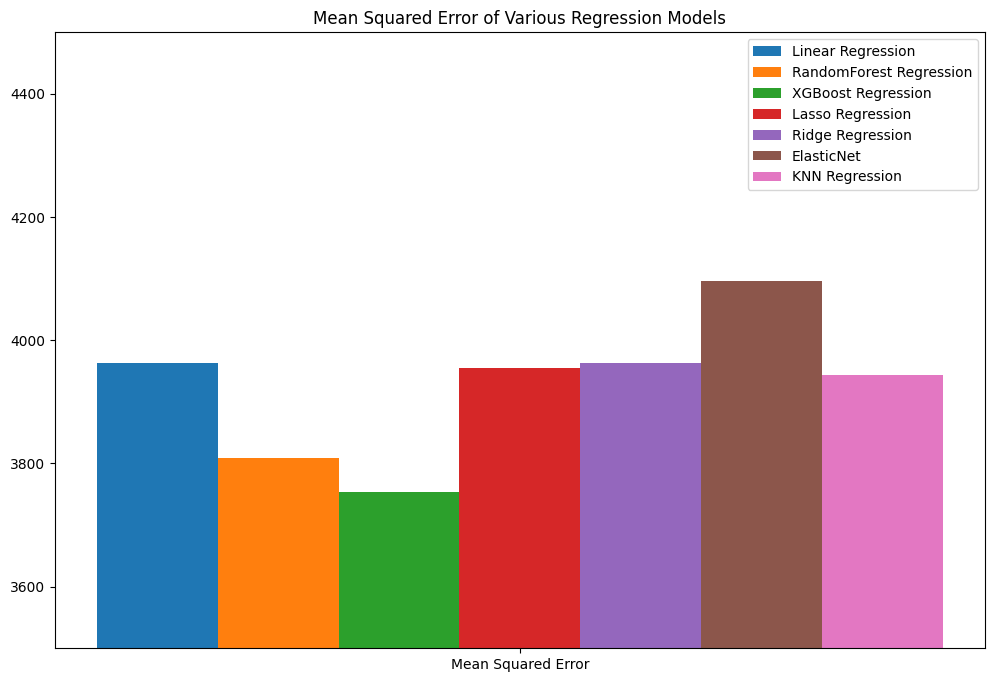

In [76]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["Mean Squared Error"]

linear_y = [linear_spuared]
randomf_y = [randomf_spuared]
xgb_y = [xgb_spuared]
lasso_y = [lasso_spuared]
ridge_y = [ridge_spuared]
elan_y = [elan_spuared]
KNN_y = [KNN_spuared]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(3500, 4500)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('Mean Squared Error of Various Regression Models')

In [1]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["Mean Absolute Error"]

linear_y = [linear_absolute]
randomf_y = [randomf_absolute]
xgb_y = [xgb_absolute]
lasso_y = [lasso_absolute]
ridge_y = [ridge_absolute]
elan_y = [elan_absolute]
KNN_y = [KNN_absolute]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(35, 45)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('Mean Absolute Error of Various Regression Models')

NameError: name 'plt' is not defined

Text(0.5, 1.0, 'R2 Score of Various Regression Models')

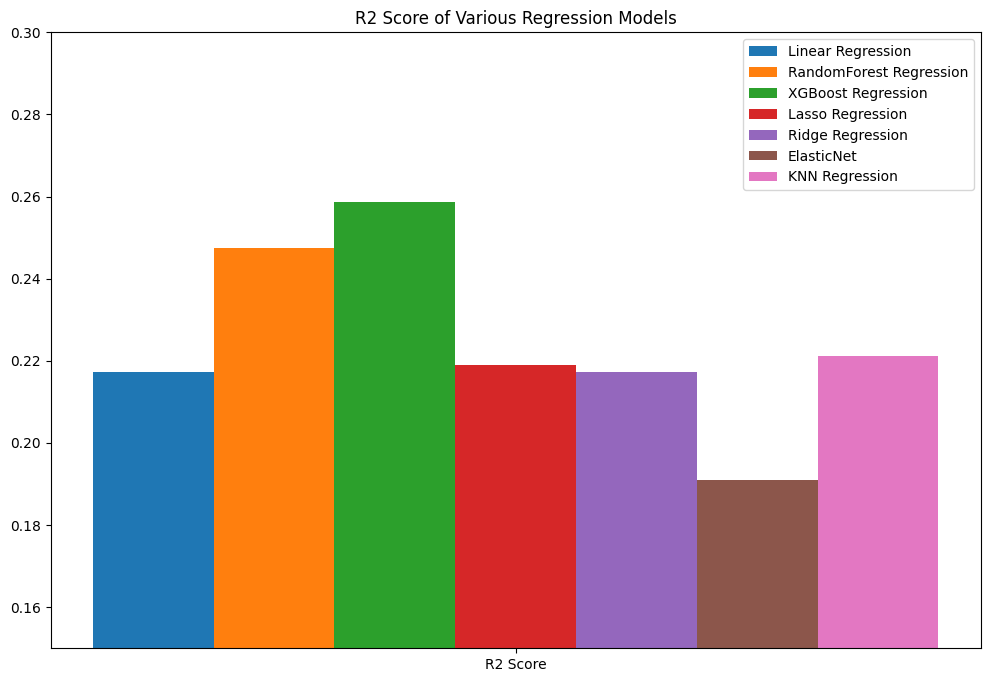

In [80]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["R2 Score"]

linear_y = [linear_r2_score]
randomf_y = [randomf_r2_score]
xgb_y = [xgb_r2_score]
lasso_y = [lasso_r2_score]
ridge_y = [ridge_r2_score]
elan_y = [elan_r2_score]
KNN_y = [KNN_r2_score]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(0.15, 0.30)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('R2 Score of Various Regression Models')

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
xgb_g_model = XGBRegressor()

In [95]:
parameter = {
    'n_estimators': [100, 300, 500],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.01],
    'reg_lambda': [0.5, 1],
}

In [96]:
grid_search = GridSearchCV(
    estimator=xgb_g_model,
    param_grid=parameter,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [97]:
tuning_model = make_pipeline(StandardScaler(), grid_search)
tuning_model.fit(X_train, Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     feature_weights=None,
                                                     gamma=Non...
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...),
                              n_jobs=-1,
                              param_grid={'colsample_bytree': [0.8, 1.0],
                                          'learning_rate': [0.01, 0.1],
                                          'max_depth': [4, 6, 8],
                                          'n_estimators': [100, 300, 500],
                                          'reg_alpha': [0, 0.01],
                                          'reg_lambda': [0.5, 1],
                                          'subsample': [0.8, 1.0]},
                              scoring='neg_mean_squared_error', verbose=1))])

In [98]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500, 'reg_alpha': 0.01, 'reg_lambda': 0.5, 'subsample': 0.8}


In [99]:
tuning_pred = tuning_model.predict(X_test)

In [100]:
tuning_spuared = mean_squared_error(Y_test, tuning_pred)
tuning_absolute = mean_absolute_error(Y_test, tuning_pred)
tuning_r2_score = r2_score(Y_test, tuning_pred)

In [105]:
print(tuning_spuared)
print(tuning_absolute)
print(tuning_r2_score)

3650.151808845809
40.483789407121755
0.27908062580313553
